## chap18 시퀀스 배열로 다루는 순환신경망(RNN)

In [1]:
# 로이터 뉴스 데이터 로드를 함
from tensorflow.keras.datasets import reuters

# num_words = 1000 -> 단어의 빈도수가 1 ~ 1000 사이의 단어만 가져 옴
(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words=1000, 
                                                        test_split=0.2)

In [2]:
print(x_train.shape, x_test.shape, x_train.shape[0] + x_test.shape[0])

(8982,) (2246,) 11228


In [3]:
import numpy as np
print(len(np.unique(y_train)))   # 46개의 카테고리 확인

46


In [4]:
# x_train 학습용 기사, y_train 뉴스의 카테고리 ( 46개 존재 )
# 각 기사의 단어 수를 맞추기 위해서 padding
from tensorflow.keras.preprocessing import sequence

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [6]:
x_train.shape

(8982, 100)

In [10]:
y_test.shape

(2246,)

In [7]:
# y_train -> one-hot encoding
from tensorflow.keras.utils import to_categorical

y = to_categorical(y_train)
y.shape

(8982, 46)

In [11]:
# 데이터를 가지고 와서  기사마다 단어 수 맞춤 ->  pad_sequences(x_train, maxlen=100)
#  모델 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
model = Sequential()
model.add(Embedding(1000, 100))  # 1000, 기사당 단어수 100
model.add(LSTM(100, activation='tanh'))  # LSTM 으로 RNN 구현
model.add(Dense(46, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, epochs=200, batch_size=20, 
          validation_data=(x_test, y_test), callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
450/450 [==============================] - 51s 105ms/step - loss: 2.2447 - accuracy: 0.4310 - val_loss: 1.9627 - val_accuracy: 0.4871
Epoch 2/200
450/450 [==============================] - 45s 101ms/step - loss: 1.7900 - accuracy: 0.5431 - val_loss: 1.7858 - val_accuracy: 0.5312
Epoch 3/200
450/450 [=

In [13]:
print("test 데이터의 정확도 :",model.evaluate(x_test, y_test)[1])

71/71 [==============================] - 3s 42ms/step - loss: 1.2798 - accuracy: 0.7208
test 데이터의 정확도 : 0.7208370566368103


In [26]:
#  학습셋과 테스트셋의 오차를 그래프로 확인
model.history.history

{'loss': [2.2067201137542725,
  1.7476600408554077,
  1.5519293546676636,
  1.3552509546279907,
  1.2200616598129272,
  1.11264169216156,
  1.0293524265289307,
  0.9405480027198792,
  0.8622623682022095,
  0.7990326285362244,
  0.7337138056755066,
  0.6739869713783264,
  0.6276662349700928,
  0.5756009221076965],
 'accuracy': [0.44288578629493713,
  0.5490981936454773,
  0.6026497483253479,
  0.6606546640396118,
  0.6952794194221497,
  0.7176575660705566,
  0.7376976013183594,
  0.7580717206001282,
  0.7842351198196411,
  0.7990425229072571,
  0.8127365708351135,
  0.8308839797973633,
  0.8410153388977051,
  0.8552660942077637],
 'val_loss': [1.8358148336410522,
  1.712289571762085,
  1.522882342338562,
  1.416891098022461,
  1.3061432838439941,
  1.2163840532302856,
  1.1869338750839233,
  1.1542043685913086,
  1.139296054840088,
  1.1532148122787476,
  1.18406081199646,
  1.1491150856018066,
  1.193375825881958,
  1.23442804813385],
 'val_accuracy': [0.5253784656524658,
  0.565004467

In [29]:
y_loss = model.history.history['loss']
y_vloss = model.history.history['val_loss']

x_len = np.arange(len(y_loss))  # x축 생성

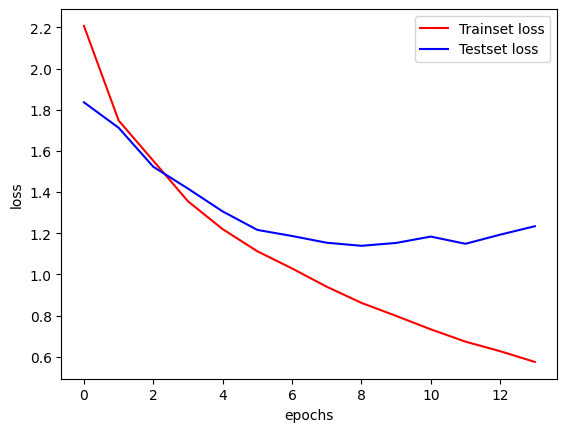

In [30]:
import matplotlib.pyplot as plt

plt.plot(x_len, y_loss, c='red', label='Trainset loss')
plt.plot(x_len, y_vloss, c='blue', label='Testset loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

# test_docs = ['중부 지방은 대체로 맑으나 남부 지방은 구름이 많겠습니다']
test_news = ['중부 지방은 대체로 맑으나 남부 지방은 구름이 많겠습니다',
            '이번 선거에는 누가 이길 수 있을까?',
            ' 올 초부터 유동성의 힘으로 주가가 일정하게 상승']
# test_news = ['이번 선거에는 누가 이길 수 있을까?']
token = Tokenizer()
token.fit_on_texts(test_news)
predict_news = token.texts_to_sequences(test_news)

In [57]:
[np.argmax(line) for line in model.predict(sequence.pad_sequences(predict_news, 
                                                                  maxlen=100))]
# np.argmax(model.predict(sequence.pad_sequences(predict_news, maxlen=100)))

1/1 [==============================] - 0s 23ms/step


[17, 7, 3]

In [49]:
model.predict(sequence.pad_sequences(predict_news, maxlen=100))

1/1 [==============================] - 0s 19ms/step


array([[0.01643257, 0.01239647, 0.02080322, 0.01063642, 0.0195509 ,
        0.02260877, 0.02535304, 0.02384465, 0.01777424, 0.02874478,
        0.01648482, 0.01659784, 0.01030809, 0.02037222, 0.02987692,
        0.02623049, 0.01403232, 0.03297979, 0.02922946, 0.0170601 ,
        0.01746269, 0.02036864, 0.02524063, 0.01963303, 0.01918731,
        0.01780778, 0.02917202, 0.0321043 , 0.02615234, 0.01852456,
        0.02826658, 0.02127572, 0.0176887 , 0.0263845 , 0.01922696,
        0.02425301, 0.01103274, 0.02314237, 0.01703662, 0.02941443,
        0.01767851, 0.01759255, 0.01935421, 0.02304164, 0.03378359,
        0.03385751]], dtype=float32)

## 2 LSTM 과 CNN 의 조합을 이용함 영화 리뷰 분류하기


In [16]:
# IMDB (영화 리뷰 ) 데이터셋에서 데이터 가져옴
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Dropout

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
print(len(x_train),len(x_test) )

25000 25000


In [59]:
# 단어의 수를 맞춤
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [19]:
# 모델 설정 -> dropout(0.5), conv1d(64, 커널사이즈 4)  추가
model = Sequential()
model.add(Embedding(5000, 500)) #  단어 임베딩
model.add(Conv1D(64, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 500)         2500000   
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          160064    
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [63]:
#  모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)

# 모델 실행
history = model.fit(x_train, y_train, batch_size=20, epochs=100, 
                    validation_split=0.25,
                   callbacks=[early_stopping])

Epoch 1/100
938/938 [==============================] - 107s 112ms/step - loss: 0.3765 - accuracy: 0.8301 - val_loss: 0.2809 - val_accuracy: 0.8816
Epoch 2/100
938/938 [==============================] - 108s 115ms/step - loss: 0.2250 - accuracy: 0.9126 - val_loss: 0.2726 - val_accuracy: 0.8846
Epoch 3/100
938/938 [==============================] - 108s 115ms/step - loss: 0.1588 - accuracy: 0.9438 - val_loss: 0.3270 - val_accuracy: 0.8787
Epoch 4/100
938/938 [==============================] - 108s 115ms/step - loss: 0.1124 - accuracy: 0.9601 - val_loss: 0.3675 - val_accuracy: 0.8811
Epoch 5/100
938/938 [==============================] - 112s 119ms/step - loss: 0.0850 - accuracy: 0.9707 - val_loss: 0.3756 - val_accuracy: 0.8752
Epoch 6/100
938/938 [==============================] - 115s 123ms/step - loss: 0.0633 - accuracy: 0.9789 - val_loss: 0.4641 - val_accuracy: 0.8674
Epoch 7/100
938/938 [==============================] - 119s 126ms/step - loss: 0.0474 - accuracy: 0.9838 - val_loss: 0

In [ ]:
# 테스트 데이터의 정확도 출력
print("Test Accuracy : ", model.evaluate(x_test, y_test)[1])

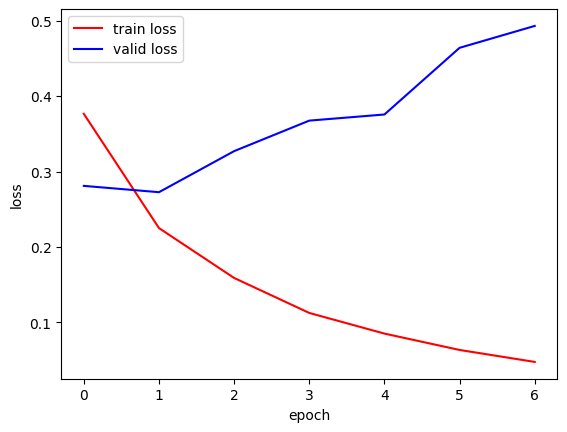

In [65]:
#  학습셋과 테스트셋의 오차를 그래프로 확인
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, c='red', label='train loss')
plt.plot(x_len, y_vloss, c='blue', label='valid loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 자연어 처리를 위한 딥러닝
## 데이터 전처리 작업
0. 불필요한 단어 또는 문장 제거
1. 문장을 단어로 토큰화
2. 각 문장을 인덱스의 배열로 변환시킴
3. 각 문장을 같은 사이즈로 padding
4. 카테고리를 원-핫 인코딩 ( 옵션 )

## 모델 설정 및 실행
model = Sequential()   # 모델 설정
model.add(Embedding(단어 입력수, 압축사이즈))  # 단어 임베딩
model.add(Conv1d())         # CNN  추가
model.add(Maxpooling1D())   # 맥스풀링
model.add(Dropout())        #  과적합 방지를 위한  dropout
model.add(LSTM())           # 순서가 있는 자료를 처리하기 위한 RNN 방법
model.add(Attention())
model.add(Dense(클래수갯수, activation=))

model.compile()     # 모델 실행 옵션
model.fit(X, y, epochs=,validation_split=, callbacks=[])  #  모델 실행

# 테스트 데이터의 정확도 확인
model.evaluate(x_test, y_test)

# 모델을 사용해서 예측
model.predict(예측하고자 하는 자료)   #  클래스별 확률 반환 -> 가장 큰 확률 찾음


In [79]:
# Attention()  레이어 추가
from attention import Attention
from tensorflow.keras.layers import Activation

# 모델 설정 -> dropout(0.5), conv1d(64, 커널사이즈 4)  추가
model = Sequential()
model.add(Embedding(5000, 500)) #  단어 임베딩
model.add(Conv1D(64, 4))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 500)         2500000   
                                                                 
 conv1d_7 (Conv1D)           (None, None, 64)          128064    
                                                                 
 activation (Activation)     (None, None, 64)          0         
                                                                 
 dropout_12 (Dropout)        (None, None, 64)          0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_8 (LSTM)               (None, None, 55)          26400     
                                                     

In [74]:
#  모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)

# 모델 실행
history = model.fit(x_train, y_train, batch_size=20, epochs=100, 
                    validation_split=0.25,
                   callbacks=[early_stopping])

Epoch 1/100
938/938 [==============================] - 113s 118ms/step - loss: 0.3664 - accuracy: 0.8318 - val_loss: 0.2728 - val_accuracy: 0.8867
Epoch 2/100
938/938 [==============================] - 111s 118ms/step - loss: 0.2141 - accuracy: 0.9160 - val_loss: 0.2881 - val_accuracy: 0.8776
Epoch 3/100
938/938 [==============================] - 110s 117ms/step - loss: 0.1477 - accuracy: 0.9461 - val_loss: 0.3075 - val_accuracy: 0.8837
Epoch 4/100
938/938 [==============================] - 108s 115ms/step - loss: 0.0990 - accuracy: 0.9628 - val_loss: 0.3462 - val_accuracy: 0.8853


In [75]:
# 테스트 데이터의 정확도 출력
print("Test Accuracy : ", model.evaluate(x_test, y_test)[1])

782/782 [==============================] - 26s 33ms/step - loss: 0.3870 - accuracy: 0.8727
Test Accuracy :  0.8726800084114075


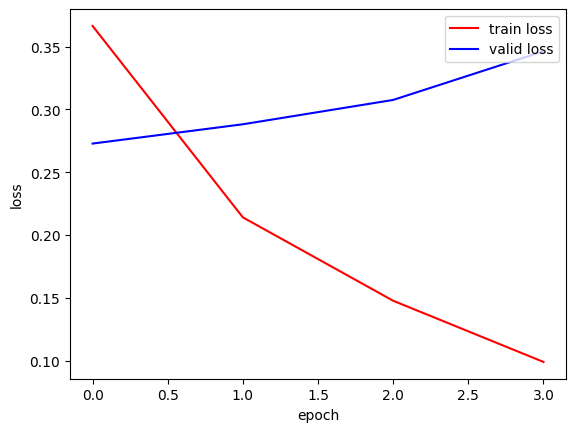

In [77]:
#  학습셋과 테스트셋의 오차를 그래프로 확인
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, c='red', label='train loss')
plt.plot(x_len, y_vloss, c='blue', label='valid loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()